# *Chapter 26*<br>   Integral Equations of Quantum Mechanics 

| | | |
|:---:|:---:|:---:|
| ![image](Figs/Cover.png)|[From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|![image](Figs/BackCover.png)|

> <span>*There are people—amongst whom I would include myself—who detest happy endings.
> —Vlasimir Nabokov, Pnin*</span>

**26 Integral Equations of Quantum Mechanics**<br>
[26.1 Bound States of Nonlocal Potentials](#26.1)<br>
[26.2 Momentum-Space Schrödinger Equation (Theory)](#26.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[26.2.1 Integral to Matrix Equations](#26.2.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[26.2.2 Delta-Shell Potential (Model)](#26.2.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[26.2.3 Binding Energies Solution](#26.2.3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[26.2.4 Wave Function (Exploration)](#26.2.4)<br>
[26.3 Scattering States of Nonlocal Potentials](#26.3)<br>
[26.4 Lippmann-Schwinger Equation (Theory)](#26.4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[26.4.1 Singular Integrals (Math)](#26.4.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[26.4.2 Numerical Principal Values](#26.4.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[26.4.3 Reducing Integral to Matrix Equations](#26.4.3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[26.4.4 Solution via Inversion, Elimination](#26.4.4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[26.4.5 Scattering Implementation](#26.4.5)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[26.4.6 Scattering Wave Function (Exploration)](#26.4.6)<br>

*We have put this chapter off till last because it is the one in which
we have the closest personal connections. The power and accessibility of
high-speed computers have changed the view as to what kind of equations
are soluble. We have seen how even nonlinear differential equations can
be solved easily, and can give new insight into the physical world. In
this chapter we examine how the integral equations of quantum mechanics
can be solved for both bound and scattering states. We start by
extending our treatment of the eigenvalue problem, earlier solved as a
coordinate-space differential equation, to the equivalent
integral-equation problem in momentum space. Then we treat the singular
integral equations for scattering, a problem whose multiple challenges
have been met well by computational physics.*

** This Chapter’s Lecture, Slide Web Links, Applets & Animations**

| | |
|---|---|
|[All Lectures](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/Lectures/index.html)|[![anything](Figs/RHLlectureMod4.png)](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/Lectures/index.html)|

| *Lecture (Flash)*| *Slides* | *Sections*|*Lecture (Flash)*| *Slides* | *Sections*|  
|- - -|:- - -:|:- - -:|- - -|:- - -:|:- - -:|
|[Integral Equations, QM Bound](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/Lectures/Modules/IntEqn_Bound/IntEqn_Bound.html)|[pdf](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/Lectures/Slides/Slides_NoAnimate_pdf/IntegralEqnBound_3Aug10.pdf)|20.1|[Integral Equations, QM Scatter](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/Lectures/Modules/IntEqn_Scatt/IntEqn_Scatt.html)|[pdf](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/Lectures/Slides/Slides_NoAnimate_pdf/IntegralEqnScatt_13Aug10.pdf)|20.3 |

## 26.1  Bound States of Nonlocal Potentials <a id="26.1"></a>


![image](Figs/Fig26_1.png)

**Figure 26.1** A dark particle moving in a dense medium in which it interacts
with all particles present. The nonlocality of the potential felt by the dark
particle at **r** arises from the interactions at all **r**′.

**Problem:** A particle undergoes an many-body interaction with a medium
(Figure 26.1). Although we can write down the many-body Schrödinger
equation that describes this interactions as the sum of many potential,
the number of coordinates involved is too large for a practical
solution. In its stead theorists have derived an effective
single-particle potential that accounts for the many particles present
by having the potential that is *nonlocal*, that is, the effective
potential at **r** that depends on the wave function at the **r**′
values of the other particles \[Landau(96)\]:

$$\tag*{26.1} V(r) \psi(r) \rightarrow \int dr' V(r, r')
\psi(r').$$

This type of interaction leads to a Schrödinger equation that is a
combined integral and differential (“integrodifferential”) equation:

$$\tag*{26.2} -\frac{1}{2\mu} \frac{d^2\psi(r)}{dr^2} + \int d r' V(r, r')
\psi(r') = E \psi(r).$$

Your **problem** is to figure out how to find the bound-state energies
*E*<sub>*n*</sub> and wave functions *ψ*<sub>*n*</sub> for the integral
equation (26.2).\[*Note:* We use natural units in which ℏ ≡ 1.\]

## 26.2  Momentum-Space Schrödinger Equation (Theory) <a id="26.2"></a>

One way of dealing with equation (26.2) is by going to momentum space
where it becomes the integral equation \[Landau(96)\]

$$\tag*{26.3} {\frac{k^{2}}{2\mu} \psi_n(k) + \frac{2}{\pi}
\int_{0}^{\infty} dp p^{2} V(k,p) \psi_n(p) = E_n \psi_n(k). }$$

We restrict our solution to angular momentum *l* = 0 partial waves, but
for simplicity of notation do not include an index to indicate that. In
(26.3), *V*(*k*, *p*) is the momentum-space representation (double
Fourier transform) of the coordinate-space potential,

$$\tag*{26.4} V(k,p) = \frac{1}{kp} \int_{0}^{\infty} dr\sin(kr) V(r)
\sin(pr).$$

*ψ*<sub>*n*</sub>(*k*) is the momentum-space wave function (the
probability amplitude for finding the particle with momentum *k*), and
is the Fourier transform of *ψ*<sub>*n*</sub>(*r*):

$$\tag*{26.5}
\psi_n(k) = \int_0^\infty  dr kr \psi_n(r)\sin(kr).$$

Equation (26.3) is an integral equation for *ψ*<sub>*n*</sub>(*k*). It
differs from an integral representation of *ψ*<sub>*n*</sub>(*k*),
because the integral in it cannot be evaluated until
*ψ*<sub>*n*</sub>(*p*) is known. Although this may seem like an
insurmountable barrier, we will transform this equation into a matrix
equation that can be solved with the matrix techniques discussed in
[Chapter 6, *Matrix Computing*](CP06.ipynb).

### 26.2.1  Integral to Matrix Equations<a id="26.2.1"></a>

We approximate the integral over the potential as a weighted sum over
*N* integration points (usually Gauss quadrature points\[*Note:* See
[Chapter 5, *Differentiation & Integration*](CP05.ipynb), for a
discussion of numerical integration.\]) for
*p* = *k*<sub>*j*</sub>,  *j* = 1, *N*:

$$\tag*{26.6}
\int_{0}^{\infty} dp p^{2} V(k,p) \psi_n(p)  \simeq \sum_{j=1}^{N}
w_jk_{j}^{2} V(k,k_j) \psi_n(k_j).$$

This converts the integral equation (26.3) to the algebraic equation

$$\tag*{26.7}
\frac{k^{2}}{2\mu} \psi_n(k) + \frac{2}{\pi} \sum_{j=1}^{N}w_j
k_{j}^{2} V(k,k_j) \psi_n(k_j) =E_n.$$

Equation (26.7) contains the *N* unknown function values
*ψ*<sub>*n*</sub>(*k*<sub>*j*</sub>), the unknown *E*<sub>*n*</sub>, as
well as the unknown functional dependence of *ψ*<sub>*n*</sub>(*k*). We
eliminate the functional dependence of *ψ*<sub>*n*</sub>(*k*) by
restricting the solution to the same values of *k* = *k*<sub>*i*</sub>
as used in the approximation of the integral. This leads to a set of *N*
coupled linear equations in (*N* + 1) unknowns:

$$\tag*{26.8}
\boxed{\frac{k^{2}_{i}}{2\mu} \psi_n(k_i) + \frac{2}{\pi} \sum_{j=1}^{N}
w_j k_{j}^{2}\ V(k_i,k_j) \psi_n(k_j) = E_n \psi_n(k_i), \quad i=1, N .}$$

As a concrete example, for *N* = 2 we have two simultaneous linear
equations

$$\begin{align}
\frac{k^{2}_{1}}{2\mu} \psi_n(k_1) + \frac{2}{\pi} w_1 k_{1}^{2}
V(k_1,k_1) \psi_n(k_1) + w_2 k_{2}^{2} V(k_1,k_2)\psi_n(k_2) & = E_n
\psi_n(k_1), \\
\frac{k^{2}_{2}}{2\mu} \psi_n(k_2) + \frac{2}{\pi} w_1 k_{1}^{2}
V(k_2,k_1) \psi_n(k_1) + w_2 k_{2}^{2} V(k_2,k_2) \psi_n(k_2)& = E_n
\psi_n(k_2).\end{align}$$

Of course realistic examples require more than two integration points
for precision.

![image](Figs/Fig26_2.png)

**Figure 26.2** The grid of momentum values on which the integral equation is
solved.

We write our coupled equations (26.8) in matrix form as

$$\tag*{26.9}
  [H] [\psi_n ] =
E_n[\psi_n]$$

or as explicit matrices

$$\begin{align}
&&\begin{pmatrix}
\frac{k_{1}^2} { 2\mu} +\frac{2}{\pi}V(k_1,k_1)k_1^2w_1
&\frac{2}{\pi}V(k_1,k_2)k_2^2w_2 & \cdots &\frac{2}{\pi}V(k_1,k_N)k_N^2w_N
\\
\frac{2}{\pi}V(k_2,k_1)k_1^2w_1 & \frac{2}{\pi}V(k_2,k_2)k_2^2w_2 +
\frac{k_{2}^2} { 2\mu} & \cdots \\
 \ddots \\
     \cdots &\cdots & \cdots& \frac{k_{N}^2} { 2\mu} + \frac{2}{\pi}V(k_N,k_N)k_N^2w_N
      \end{pmatrix}
        \\
        &&\quad\times\begin{pmatrix}
\psi_n(k_{1}) \\
 \psi_n(k_{2}) \\
 \ddots \\
     \psi_n(k_{N})
     \end{pmatrix}  = E_n\begin{pmatrix}
        \psi_n(k_{1}) \\
 \psi_n(k_{2}) \\
 \ddots \\
     \psi_n(k_{N})
     \end{pmatrix}. \tag*{26.10}\end{align}$$

Equation (26.9) is the matrix representation of the Schrödinger equation
(26.3). The wave function *ψ*<sub>*n*</sub>(*k*) on the grid is the
*N* × 1 vector

$$\tag*{26.11} [\psi_n(k_i)] =\begin{pmatrix}
\psi_n(k_{1}) \\
 \psi_n(k_{2}) \\
 \ddots \\
     \psi_n(k_{N}) \end{pmatrix}.$$

The astute reader may be questioning the possibility of solving *N*
equations for (*N* + 1) unknowns, *ψ*<sub>*n*</sub>(*k*<sub>*i*</sub>)
and *E*<sub>*n*</sub>. Only sometimes, and only for certain values of
*E*<sub>*n*</sub> (eigenvalues), will the computer be able to find
solutions. To see how this arises, we try to apply the matrix inversion
technique (which we will use successfully for scattering in $ 26.3). We
rewrite (26.9) as

$$\tag*{26.12} [H-E_nI] [\psi_n] = [0]$$

and multiply both sides by the inverse of \[*H* − *E*<sub>*n*</sub>*I*\]
to obtain the formal solution

$$\tag*{26.13} [\psi_n] = [H-E_nI]^{-1}[0] .$$

This equation tells us that (1) if the inverse exists, then we have the
*trivial* solution *ψ*<sub>*n*</sub> ≡ 0, which is not revealing, and
(2) for a nontrivial solution to exist, our assumption that the inverse
exists must be incorrect. Yet we know from the theory of linear
equations that the inverse fails to exist when the determinant vanishes:

$$\tag*{26.14}
\boxed{\det [H-E_nI] = 0}    \hspace{6ex}\mbox{(bound-state condition)}.$$

Equation (26.14) is the *N* + 1th equation needed to find unique
solutions to the eigenvalue problem. Although, there is no guarantee
that solutions of (26.14) can always be found, if they are found they
are the desired *eigenvalues* of (26.9).

### 26.2.2  Delta-Shell Potential (Model)<a id="26.2.2"></a>

To keep things simple and to have an analytic answer to compare with, we
consider the local delta-shell potential:

$$\tag*{26.15} V(r) = \frac{\lambda}{2\mu} \delta(r-b).$$

This might be a good model for an interaction that occurs when two
particles are predominantly a fixed distance *b* apart. We use (26.4) to
determine its momentum-space representation:

$$\tag*{26.16} V(k',k) = \int_{0}^{\infty} \frac{\sin(k'r')}{k'k}
\frac{\lambda}{2\mu} \delta(r-b) \sin(kr)   dr  = \frac{\lambda}
{2\mu} \frac{\sin (k'b) \sin(kb)}{k'k}.$$

*Beware:* We have chosen this potential because it is easy to evaluate
the momentum-space matrix element of the potential. However, its
singular nature in *r* space leads to (26.16) having a very slow falloff
in *k* space, and this causes the integrals to converge so slowly that
numerics are not as precise as we would like.

If the energy is parameterized in terms of a wave vector *κ* by
*E*<sub>*n*</sub> = −*κ*<sup>2</sup>/2*μ*, then for this potential there
is, at most, one bound state and it satisfies the transcendental
equation \[Gottfried(66)\]

$$\tag*{26.17} e^{-2\kappa b} - 1 = \frac{2 \kappa} {\lambda}.$$

Note that bound states occur only for attractive potentials. For the
present case this requires *λ* &lt; 0.

**Exercise:** Pick some values of *b* and *λ* and verify that (26.17)
can be solved for *κ*.

### 26.2.3  Binding Energies Solution<a id="26.2.3"></a>

An actual computation may follow two paths. The first calls subroutines
to evaluate the determinant of the \[*H* − *E*<sub>*n*</sub>*I*\] matrix
in (26.14), and then to *search* for those values of energy for which
the computed determinant vanishes. This provides *E*<sub>*n*</sub>, but
not wave functions. The other approach calls an eigenproblem solver that
may give some or all eigenvalues and eigenfunctions. In both cases the
solution is obtained iteratively, and you may be required to guess
starting values for both the eigenvalues and eigenvectors. In
Listing 26.1 we present our solution of the integral equation for bound
states of the delta-shell potential using the NumPy matrix library and
the `gauss` method for Gaussian quadrature points and weights.

[**Listing 26.1  Bound.py**](http://www.science.oregonstate.edu/~rubin/Books/CPbook/Codes/PythonCodes/Bound.py)
solves the Lippmann-Schwinger integral equation for bound states within
a delta-shell potential. The integral equations are converted to matrix
equations using Gaussian grid points, and they are solved with <span
style="font-variant:small-caps;">linalg</span>.

1.  Write a program, or modify our’s, to solve the integral
    equation (26.9) for the delta-shell potential (26.16). Either find
    the *E*<sub>*n*</sub>’s for which the determinant vanishes *or*,
    find the eigenvalues and eigenvectors for this *H*.

2.  Set the scale by setting 2*μ* = 1 and *b* = 10.

3.  Set up the potential and Hamiltonian matrices *V*(*i*, *j*) and
    *H*(*i*, *j*) for Gaussian quadrature integration with at least
    *N* = 16 grid points.

4.  Adjust the value and sign of *λ* for bound states. A good approach
    is to start with a large negative value for *λ* and then make it
    less negative. You should find that the eigenvalue moves up
    in energy.

5.  *Note:* Your eigenenergy solver may return several eigenenergies.
    The true bound state will be at negative energy and change little as
    the number of grid points changes. The others are
    numerical artifacts.

6.  Try increasing the number of grid points in steps of 8, for example,
    16, 24, 32, 64, …, and see how the energy changes.

7.  Extract the best value for the bound-state energy and estimate its
    precision by seeing how it changes with the number of grid points.

8.  If you are solving the eigenvalue problem, check your solution by
    comparing the RHS and LHS in the matrix multiplication
    \[*H*\]\[*ψ*<sub>*n*</sub>\]=*E*<sub>*n*</sub>\[*ψ*<sub>*n*</sub>\].

9.  Verify that, regardless of the potential’s strength, there is only a
    single bound state and that it gets deeper as the magnitude of
    *λ* increases. Compare with (26.17).

### 26.2.4  Wave Function (Exploration)<a id="26.2.4"></a>

1.  Determine the momentum-space wave function *ψ*<sub>*n*</sub>(*k*)
    using an eigen problem solver. Does *ψ*<sub>*n*</sub>(*k*) fall off
    at *k* → ∞? Does it oscillate? Is it well behaved at the origin?

2.  Using the same points and weights as used to evaluate the integral
    in the integral equation, determine the coordinate-space wave
    function via the Bessel transform

    $$\tag*{26.18}
    \psi_n(r) =\int_0^\infty dk \psi_n(k) \frac{\sin(kr)}{kr}k^2.$$

    Does *ψ*<sub>*n*</sub>(*r*) fall off as you would expect for a bound
    state? Does it oscillate? Is it well behaved at the origin?

3.  Compare the *r* dependence of this *ψ*<sub>*n*</sub>(*r*) to the
    analytic wave function:

    $$\tag*{26.19}
    \psi_n(r) \propto\begin{cases}
    e^{-\kappa r} - e^{\kappa r} , & \mbox{for} \ r\lt;b,\\
    e^{-\kappa r}, & \mbox{for}  \ r\gt;b.
    \end{cases}$$

## 26.3  Scattering States of Nonlocal Potentials ⊙ <a id="26.3"></a>

[![image](Figs/RHLlectureMod4.png)](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/Lectures/Modules/IntEqn_Scatt/IntEqn_Scatt.html)

**Problem:** Again we have a particle interacting with the nonlocal
potential discussed for bound states (Figure 26.3 left), only now the
particle has sufficiently high energy that it scatters from rather than
binds with the medium. Your **problem** is to determine the scattering
cross section for scattering from a nonlocal potential.

|A |B |
|:- - -:|:- - -:|
| ![image](Figs/Fig26_3a.png)|![image](Figs/Fig26_3b.png)|

**Figure 26.3** **A:** A projectile (dark particle at *r*) scattering from a
dense medium. **B:** The same process viewed in the CM system where
the projectile and target always have equal and opposite momenta.

## 26.4  Lippmann-Schwinger Equation (Theory) <a id="26.4"></a>

Because experiments measure scattering amplitudes and not wave
functions, it is more direct to have a theory dealing with amplitudes
rather than wave functions\[*Note:* To make the presentation simpler,
but still perfectly valid, we solve for the *reaction matrix\] *R*, but
call it the scattering amplitude.*. An integral form of the Schrödinger
equation dealing with the scattering amplitude *R* is the
*Lippmann-Schwinger equation*:

$$\tag*{26.20} R(k',k) = V(k',k) + \frac{2}{\pi}\mbox{$\mathcal{P}$}
  \int_{0}^{\infty} dp   \frac{p^{2} V(k',p) R(p,k)}
  {(k_{0}^{2}-p^{2})/2\mu}.$$

where the symbol 𝒫 in (26.20) indicates the Cauchy principal-value
prescription for avoiding the singularity arising from the zero of the
denominator (we discuss how to do that next).

As for the bound-state problem, this equation is for partial wave
*l* = 0 and ℏ = 1. In (26.20) the momentum *k*<sub>0</sub> is related to
the energy *E* and the reduced mass *μ* by

$$\tag*{26.21} E = \frac{k_{0}^{2}}{2 \mu}, \qquad \mu =
\frac{m_{1}m_{2}}{m_{1} + m_{2}}.$$

The initial and final COM momenta *k* and *k*′ are the momentum-space
variables. The experimental observable that results from a solution of
(26.20) is the diagonal matrix element
*R*(*k*<sub>0</sub>, *k*<sub>0</sub>), which is related to the
scattering phase shift *δ*<sub>0</sub> and thus the cross section:

$$\begin{align}
\tag*{26.22}
R(k_{0},k_{0}) = -\frac{\tan \delta_{l}}{\rho}, \quad \rho = 2\mu
k_{0}.\end{align}$$

Note that (26.20) is not just the evaluation of an integral, it is an
integral equation in which *R*(*p*, *k*) is integrated over all *p*. Yet
because *R*(*p*, *k*) is unknown, the integral cannot be evaluated until
after the equation is solved!

### 26.4.1  Singular Integrals (Math)<a id="26.4.1"></a>

A *singular* integral $$\begin{align}
\tag*{26.23}
\mbox{$\mathcal{G}$} = \int_{a}^{b} g(k)  dk ,\end{align}$$

is one in which the integrand *g*(*k*) is singular at a point
*k*<sub>0</sub> within the integration interval \[*a*, *b*\], yet with
the integral 𝒢 remaining finite. (If the integral itself were infinite,
we could not compute it.) Unfortunately, computers are notoriously bad
at dealing with infinite numbers, and if an integration point gets too
near the singularity, overwhelming subtractive cancellation or overflow
may occur.Consequently, we apply some results from complex analysis
before evaluating singular integrals numerically.\[*Note:* \[Singh &
Thompson(93)\] describe a different approach using Maple and
Mathematica.\]

![image](Figs/Fig26_4.png)

**Figure 26.4** Three different paths in the complex *k*′ plane used to
evaluate line integrals when there are singularities. Here the singularities are at
*k* and −*k*, and the integration variable is *k*′.

In Figure 26.4 we show three ways to avoid the singularity of an
integrand. The paths in Figures 26.4A and  26.4B move the singularity
slightly off the real *k* axis by giving the singularity a small
imaginary part $\pm i\epsilon$. The Cauchy principal-value prescription 𝒫 in
Figure 26.4C is seen to follow a path that “pinches” both sides of the
singularity at *k*<sub>0</sub>, but does not to pass through it:

$$\tag*{26.24}
\mbox{$\mathcal{P}$} \int_{-\infty}^{+\infty} f(k)   dk =
\lim_{\epsilon \rightarrow 0}\left[\int_{-\infty}^{k_{0}-\epsilon}
f(k) dk \ +\ \int_{k_{0}+\epsilon}^{+\infty} f(k) \ dk \right].$$

The preceding three prescriptions are related by the identity

$$\tag*{26.25}
\int_{-\infty}^{+\infty} \frac{f(k)   dk}{k-k _{0} \pm i
\epsilon} = \mbox {$\mathcal{P}$} \int_{-\infty}^{+\infty}
\frac{f(k)   dk'}{k-k_{0}} \mp i\pi
f(k_{0}),$$

which follows from Cauchy’s residue theorem.

### 26.4.2  Numerical Principal Values<a id="26.4.2"></a>

A direct numerical evaluation of the principal value limit (26.24) is
troublesome because of the large cancellations that occur near the
singularity. A better algorithm follows from the mathematical theorem

$$\tag*{26.26}
\mbox{$\mathcal{P}$} \int_{-\infty}^{+\infty} \frac{dk}{k-k_{0}} =
0 .$$

This equation says that the curve of 1/(*k* − *k*<sub>0</sub>) as a
function of *k* has equal and opposite areas on both sides of the
singular point *k*<sub>0</sub>. If we break the integral up into one
over positive *k* and one over negative *k*, a change of variable
*k* → −*k* permits us to rewrite (26.26) as

$$\tag*{26.27}
\mbox{$\mathcal{P}$} \int_{0}^{+\infty} \frac{dk}{k^{2}-k_{0}^{2}}
=0 .$$

We observe that the principal-value exclusion of the singular point’s
contribution to the integral is equivalent to a simple subtraction of
the zero integral (26.27):

$$\tag*{26.28}
\mbox{$\mathcal{P}$} \int_{0}^{+\infty} \frac{f(k)
dk}{k^{2}-k_{0}^{2}} = \int_{0}^{+\infty} \frac{[f(k)-f(k_{0})] dk}{k^{2}-k_{0}^{2}}
.$$

Notice that there is no 𝒫 on the RHS of (26.28) because the integrand is
no longer singular at *k* = *k*<sub>0</sub> (it is proportional to the
$df/dk$) and can therefore be evaluated numerically using the
usual rules. The integral (26.28) is called the *Hilbert transform* of
*f* and also arises in inverse problems.

### 26.4.3  Reducing Integral Equations to Matrix Equations (Method)<a id="26.4.3"></a>

Now that we can handle singular integrals, we go back to reducing the
integral equation (26.20) to a set of linear equations that can be
solved with matrix methods. We start by rewriting the principal-value
prescription as a definite integral \[Haftel & Tabakin(70)\]:

$$\tag*{26.29} R(k',k) = V(k',k) + \frac{2}{\pi} \int_{0}^{\infty}\!\!\! dp
\frac {p^{2} V(k',p) R(p,k) -k_{0}^{2} V(k',k_{0}) R(k_{0},k) }
{(k_{0}^{2}-p^{2})/2\mu}.$$

We convert this integral equation to linear equations by approximating
the integral as a sum over *N* integration points (usually Gaussian)
*k*<sub>*j*</sub> with weights *w*<sub>*j*</sub>:

$$\begin{align}
R(k,k_{0}) \simeq V(k,k_{0}) + \frac{2}{\pi} \sum_{j=1}^{N}
\frac{ k_{j}^{2} V(k,k_{j}) R(k_{j},k_{0}) w_{j} }{(k_{0}^{2} -
k_{j}^{2})/2\mu}  -\frac{2}{\pi} k_{0}^{2} V(k,k_{0}) R(k_{0},k_{0})
\sum_{m=1}^{N} \frac {w_{m} }{(k_{0}^{2} -
k_{m}^{2})/2\mu}.\tag*{26.30}\end{align}$$

We note that the last term in (26.30) implements the principal-value
prescription and cancels the singular behavior of the previous term.
Equation (26.30) contains the (*N* + 1) unknowns
*R*(*k*<sub>*j*</sub>, *k*<sub>0</sub>) for *j* = 0, *N*. We turn it
into (*N* + 1) simultaneous equations by evaluating it for (*N* + 1) *k*
values on a grid (Figure 26.2) consisting of the observable momentum
*k*<sub>0</sub> and the integration points:

$$\tag*{26.31} k= k_{i} = \left\{\begin{array}{lll} k_{j}, & j=1,N
&\mbox{(quadrature points),}\\ k_{0}, & i=0 &\mbox{(observable point).}
\end{array} \right.$$

There are now (*N* + 1) linear equations for (*N* + 1) unknowns
*R*<sub>*i*</sub> ≡ *R*(*k*<sub>*i*</sub>, *k*<sub>0</sub>):

$$\tag*{26.32} R_{i} = V_{i} + \frac{2}{\pi} \sum_{j=1}^{N} \frac{ k_{j}^{2}
V_{ij}R_{j}w_{j}}{(k_{0}^{2}-k_{j}^{2})/2\mu } -\frac{2}{\pi} k_{0}^{2}V_{i0}R_{0}
\sum_{m=1}^{N} \frac{w_{m}} {(k_{0}^{2}-k_{m}^{2})/2\mu }.$$

We express these equations in matrix form by combining the denominators and
weights into a single denominator vector *D*:

 $$D_{i} =\begin{cases}
+\frac{2}{\pi}\frac{ w_{i}k_{i}^{2}}{(k_{0}^{2} - k_{i}^{2})/2\mu} , &
\mbox{for}\ \ i=1,N,\\ 
-\frac{2}{\pi} \sum_{j=1}^{N}\frac{
w_{j}k_{0}^{2}}{(k_{0}^{2} - k_{j}^{2})/2\mu} , & \mbox{for} \ \ i=0.
\end{cases}\tag*{26.33}$$

The linear equations (26.32) now assume that the matrix form

$$\tag*{26.34} R-DVR = \left[ 1 -DV\right]R = V,$$

where *R* and *V* are *column vectors* of length *N* + 1:

$$\tag*{26.35} [R] =\begin{pmatrix} R_{0,0} \\ R_{1,0} \\
\ddots \\
R_{N,0} \end{pmatrix}, \quad
    [V]  = \begin{pmatrix}
        V_{0,0} \\
 V_{1,0}    \\
 \ddots  \\
     V_{N,0}
     \end{pmatrix}.$$

We call the matrix \[1 − *D**V*\] in (26.34) the wave matrix *F* and write the
integral equation as the matrix equation

$$\tag*{26.36} [F][R] = [V],\hspace{10ex} F_{ij} = \delta_{ij} - D_{j}V_{ij}.$$

With *R* the unknown vector, (26.36) is in the standard form
$\mathbf{A = bX}$, which can be solved by the mathematical subroutine
libraries discussed in [Chapter 6, *Matrix Computing.*](CP06.ipynb)

### 26.4.4  Solution via Inversion, Elimination<a id="26.4.4"></a>

An elegant (but alas not most efficient) solution to (26.36) is by
matrix inversion:

$$\tag*{26.37} [R] = [F]^{-1} [V].$$

Because the inversion of even complex matrices is a standard routine in
mathematical libraries, (26.37) is a *direct solution* for the *R*
amplitude. Unless you need the inverse for other purposes (like
calculating wave functions), a more efficient approach is to use
Gaussian *elimination* to find an \[*R*\] that solves
\[*F*\]\[*R*\]=\[*V*\] without computing the inverse.

[**Listing 26.2  Scatt.py**](http://www.science.oregonstate.edu/~rubin/Books/CPbook/Codes/PythonCodes/Scatt.py)
solves the Lippmann-Schwinger integral equation for scattering from a
delta-shell potential. The singular integral equations are regularized
by a subtraction, converted to matrix equations using Gaussian grid
points, and then solved with NumPy matrix library routines.

In [ ]:
### Scatter.py, Notebook Version

Populating the interactive namespace from numpy and matplotlib
working count to 900
100
200
300
400
500
600
700
800
900
Done


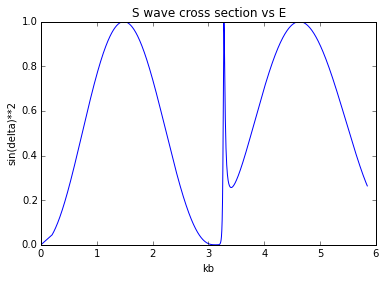

In [1]:
### Scatter.py, Notebook Version

from __future__ import division,print_function
from IPython.display import IFrame

import numpy as np 

import numpy.linalg as lina                      # Numpy's LinearAlgebra will be lina
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%pylab inline

b = 10.0
n = 26
M=27
k = np.zeros((M), float)
x = np.zeros((M), float)
w = np.zeros((M), float)
Finv = np.zeros((M,M),float)
F = np.zeros((M,M), float)
D = np.zeros((M), float)
V = np.zeros((M), float);
k0=np.zeros((901),float)
Sin2=np.zeros((901),float)
Vvec = np.zeros((n+1,1),float)
scale = n/2
lambd = 1.5

def gauss(npts, job, a, b, x, w):
    m = 0
    i = 0
    j = 0
    t = 0.
    t1 = 0.
    pp = 0.
    p1 = 0.
    p2 = 0.
    p3 = 0.  
    eps = 3.E-14                    # Accuracy: ADJUST!
    m = (npts  +  1)//2 
    for i in range(1, m + 1):
        t = np.cos(np.pi*(float(i) - 0.25)/(float(npts)  +  0.5) )
        t1 = 1 
        while( (abs(t - t1) ) >=  eps):
            p1 = 1. ;  p2 = 0.  
            for j in range(1, npts + 1):
                p3 = p2;   p2 = p1 
                p1 = ( (2.*float(j) - 1)*t*p2 - (float(j) - 1.)*p3)/(float(j) )
            pp = npts*(t*p1 - p2)/(t*t - 1.) 
            t1 = t
            t = t1  -  p1/pp
        x[i-1] =  - t
        x[npts - i] = t 
        w[i - 1] = 2./( (1. - t*t)*pp*pp) 
        w[npts - i] = w[i - 1]  
        # print" x[i - 1]", x[i - 1] , " w " , w[npts - i]
    if (job ==  0):
        for i in range(0, npts):
            x[i] = x[i]*(b - a)/2.  +  (b  +  a)/2. 
            w[i] = w[i]*(b - a)/2. 
    if (job ==  1):
        for i in range(0, npts):
            xi   = x[i]
            x[i] = a*b*(1.  +  xi) / (b  +  a - (b - a)*xi) 
            w[i] = w[i]*2.*a*b*b/( (b  +  a - (b - a)*xi)*(b + a - (b - a)*xi) )
    if (job ==  2):
        for i in range(0, npts):
            xi = x[i]
            x[i] = (b*xi +  b  +  a  +  a) / (1. - xi) 
            w[i] = w[i]*2.*(a  +  b)/( (1. - xi)*(1. - xi) )
n=26
scale = n/2
gauss(n, 2, 0., scale, k, w)                                    # Set up points & wts
ko = 0.02
ck=0.2*np.pi/1000.0
print("working count to 900")
for m in range(1,901):	
    k[n] = ko		
    for i in range (0, n):
        D[i]=2/np.pi*w[i]*k[i]*k[i]/(k[i]*k[i]-ko*ko)     # D matrix
    D[n] = 0. 
    for  j in range(0,n):
        D[n]=D[n]+w[j]*ko*ko/(k[j]*k[j]-ko*ko)
    D[n] = D[n]*(-2./np.pi)    
    for i in range(0,n+1):                             # Set up F matrix and V vector       
        for j in range(0,n+1):
            pot = -b*b * lambd * np.sin(b*k[i])*np.sin(b*k[j])/(k[i]*b*k[j]*b)            
            F[i][j] = pot*D[j]	                                             # Form F
            if i==j:
                F[i][j] = F[i][j] + 1.                
        V[i] = pot                                                         # Define V
    for  i in range(0,n+1):
        Vvec[i][0]= V[i]                                   

    Finv = lina.inv(F)                                # Use LinearAlgebra fir inverse
    R = np.dot(Finv, Vvec)                                             # Matrix multiply
    RN1 = R[n][0]
    shift = math.atan(-RN1*ko)
    sin2 = (np.sin(shift))**2
    Sin2[m]=sin2
    k0[m]=ko
    #sin2plot.plot(pos = (ko*b,sin2))                             # Plot sin**2(delta)
    ko = ko + ck
    if(m%100==0):
        print(m)
    
#k0=np.arange(0,901,ck)
plt.plot(k0*b,Sin2)
plt.title("S wave cross section vs E")
plt.xlabel("kb")
plt.ylabel("sin(delta)**2")
#plt.show()
print("Done")

### 26.4.5  Scattering Implementation<a id="26.4.5"></a>

For the scattering problem, we use the same delta-shell potential
(26.16) discussed in §26.2.2 for bound states:

$$\tag*{26.38} V(k',k) = \frac{-|\lambda|} {2\mu k'k} \sin(k'b)\sin(kb).$$

This is one of the few potentials for which the Lippmann-Schwinger
equation (26.20) has an analytic solution \[Gottfried(66)\] with which
to check:

$$\tag*{26.39}
\tan  \delta_0  = \frac{\lambda b \sin^2 (kb)}{kb-\lambda b \sin
(kb) \cos(kb)}.$$

Our results were obtained with 2*μ* = 1, $\lambda b = 15$, and *b* = 10, the
same as in \[Gottfried(66)\]. In Figure 26.5 we give a plot of
sin<sup>2</sup>*δ*<sub>0</sub> *versus* $kb$, which is proportional to
the scattering cross section arising from the angular momentum *l* = 0
phase shift. It is seen to reach its maximum values at energies
corresponding to resonances. In Listing 26.2 we present our program for
solving the scattering integral equation using the NumPy Linear Algebra
matrix library and the `gauss` method for quadrature points. For your
implementation:

![image](Figs/Fig26_5.png)

 **Figure 26.5** The energy dependence of the
cross section for *l* = 0 scattering from an attractive delta-shell
potential with *λ*b* = 15. The dashed curve is the analytic solution
(26.39), and the solid curve results from numerically solving the
integral Schrödinger equation, either via direct matrix inversion or via
LU decomposition.

1.  Set up the matrices `V[], D[],` and `F[,]`. Use at least *N* = 16
    Gaussian quadrature points for your grid.

2.  Calculate the matrix *F*<sup>−1</sup> using a library subroutine.

3.  Calculate the vector *R* by matrix multiplication
    *R* = *F*<sup>−1</sup>*V*.

4.  Deduce the phase shift *δ* from the *i* = 0 element of *R*:

    $$\tag*{26.40}
    R(k_{0},k_{0}) = R_{0,0} =    -\frac{\tan \delta}{\rho}, \quad
    \rho = 2\mu k_{0}.$$

5.  Estimate the precision of your solution by increasing the number of
    grid point in steps of two (we found the best answer for *N* = 26).
    If your phase shift changes in the second or third decimal place,
    you probably have that much precision.

6.  Plot sin<sup>2</sup>*δ* *versus* energy
    *E* = *k*<sub>0</sub><sup>2</sup>/2*μ* starting at zero energy and
    ending at energies where the phase shift is again small. Your
    results should be similar to those in Figure 26.5. Note that a
    *resonance* occurs when *δ*<sub>*l*</sub> increases rapidly through
    *π*/2, that is, when sin<sup>2</sup>*δ*<sub>0</sub> = 1.

7.  Check your answer against the analytic results (26.39).

### 26.4.6  Scattering Wave Function (Exploration)<a id="26.4.6"></a>

The *F*<sup>−1</sup> matrix that occurred in our solution to the
integral equation

$$\tag*{26.41} R = F^{-1}V = (1-VG)^{-1} V$$

is actually quite useful. In scattering theory it is known as the *wave
matrix* because it is used in expansion of the wave function:

$$\tag*{26.42} u(r) = N_{0} \sum_{i=1}^{N} \frac{\sin(k_{i}r)}{k_{i}r}
F(k_{i},k_{0})^{-1} .$$

Here *N*<sub>0</sub> is a normalization constant and the *R* amplitude
is appropriate for standing-wave boundary conditions.

1.  Plot *u*(*r*) and compare it to a free wave.